In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_data = pd.read_csv('../data/cleaned_twitter_training.csv')
validation_data = pd.read_csv('../data/cleaned_twitter_validation.csv')

In [89]:
training_data.head()

,Unnamed: 0,tweet_id,entity,sentiment,tweet_content,cleaned_tweet_content
0,0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


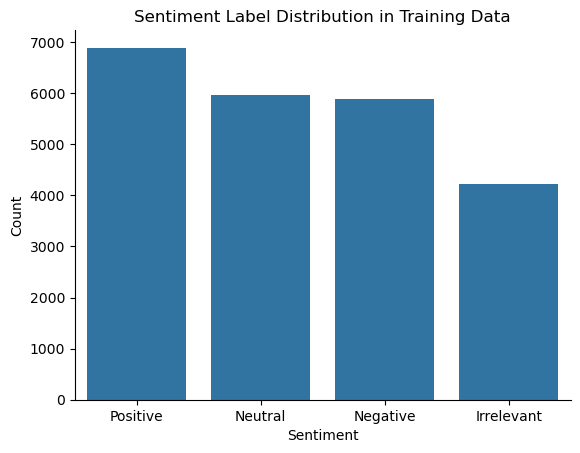

In [91]:
sentiment_counts = training_data['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Label Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

sns.despine()

plt.savefig('../visualizations/sentiment_distribution_1.png')
plt.show()

In [93]:
training_data[training_data['sentiment'] == 'Irrelevant'].head()

,Unnamed: 0,tweet_id,entity,sentiment,tweet_content,cleaned_tweet_content
97,102,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...,appreciate sonic concepts praxis valenzuela la...
98,103,2418,Borderlands,Irrelevant,Appreciate the (sound) concepts / practices th...,appreciate sound concepts practices valenzuela...
99,104,2418,Borderlands,Irrelevant,Evaluate the (sound) concepts / concepts of Va...,evaluate sound concepts concepts valensela lan...
100,105,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...,appreciate sonic concepts praxis valenzuela mo...
101,106,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...,appreciate sonic electronic concepts praxis va...


In [95]:
# Drop Irrelevant data
training_data = training_data[training_data['sentiment'] != 'Irrelevant']
training_data['sentiment'].value_counts()

sentiment
Positive    6888
Neutral     5958
Negative    5889
Name: count, dtype: int64

In [97]:
# Drop Irrelevant data
validation_data = validation_data[validation_data['sentiment'] != 'Irrelevant']
validation_data['sentiment'].value_counts()

sentiment
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

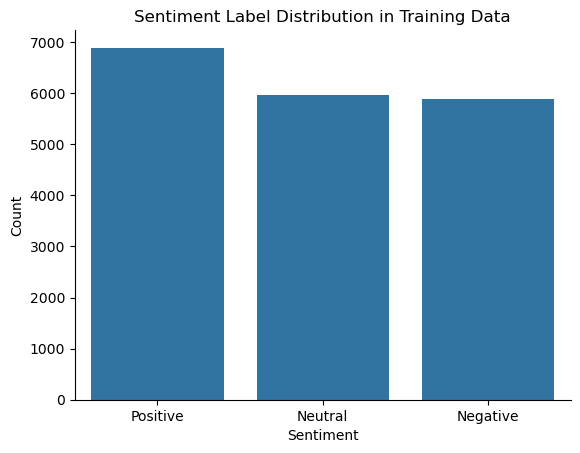

In [99]:
sentiment_counts = training_data['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Label Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

sns.despine()

plt.savefig('../visualizations/sentiment_distribution_2.png')
plt.show()

In [103]:
training_data['cleaned_tweet_content'] = training_data['cleaned_tweet_content'].fillna('').astype(str)
validation_data['cleaned_tweet_content'] = validation_data['cleaned_tweet_content'].fillna('').astype(str)
training_data = training_data[training_data['cleaned_tweet_content'] != '']
validation_data = validation_data[validation_data['cleaned_tweet_content'] != '']

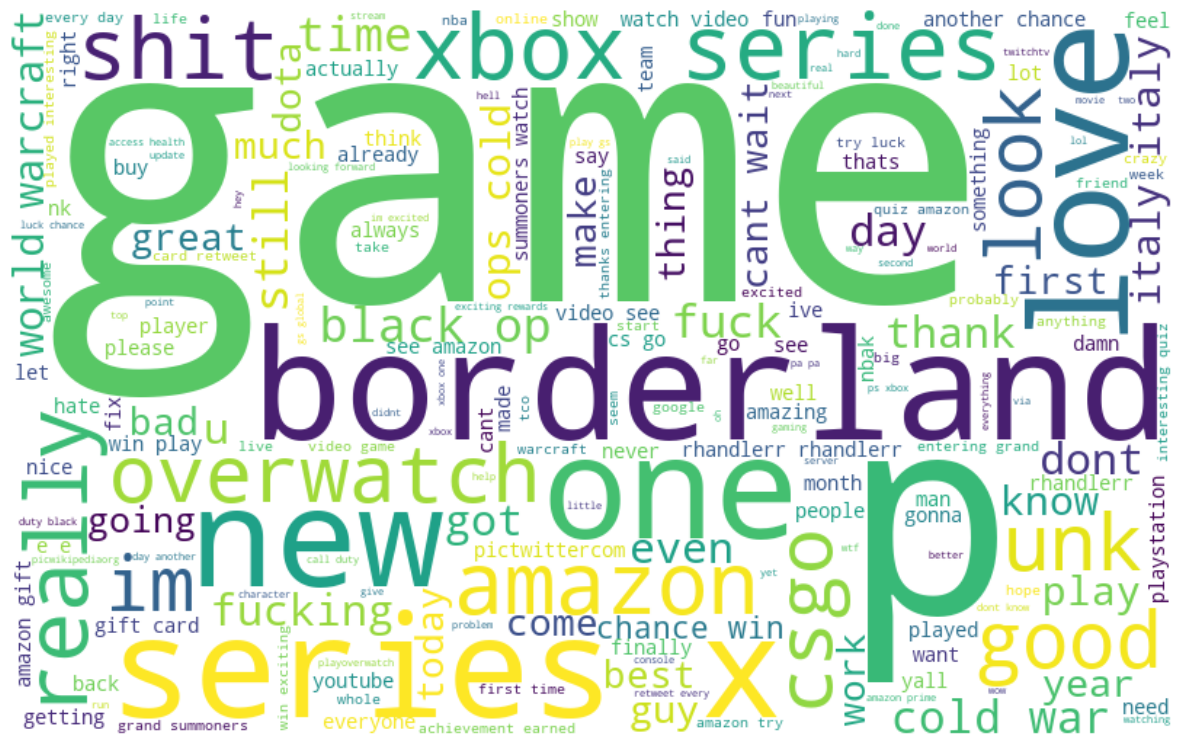

In [105]:
from wordcloud import WordCloud

all_words = ' '.join(training_data['cleaned_tweet_content'])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_words)
wordcloud.to_file('../visualizations/wordcloud.png')
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [129]:
import re

def remove_urls(text):
    """
    Remove URLs from the input text based on common URL patterns, 
    including 'http', 'www', and domain names like '.com', '.net', etc.

    Parameters:
        text (str): The input text containing potential URLs.
    
    Returns:
        str: The text with all URLs removed.
    
    Processing Steps:
        1. Identify and remove any sequence that starts with 'http' or 'www'.
        2. Remove strings containing domain patterns such as '.com', '.net', '.org', etc.
    """
    url_pattern = r'http\S+|www\S+|\S+\.(com|net|org|co)\S*'
    return re.sub(url_pattern, '', text)

def clean_random_strings(text):
    """
    Clean the text by removing random short strings, such as 
    single or two-character words, and extra whitespace.

    Parameters:
        text (str): The input text to clean.
    
    Returns:
        str: The cleaned text with short words removed and extra spaces normalized.
    
    Processing Steps:
        1. Remove words that are 1 or 2 characters long.
        2. Replace multiple spaces with a single space and strip leading/trailing spaces.
    """
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

custom_stopwords = ['unk', 'games', 'pictwittercom', 'game', 'borderlands', 'csgo' 'one', 'overwatch', 'xbox', 'series', 'series x', 'amazon', 'world warcraft', 'black op', 'black ops', 'borderland', 'youtube']

def remove_stopwords(text, stopwords):
    """
    Remove specified stopwords from the input text.

    Parameters:
        text (str): The input text from which stopwords will be removed.
        stopwords (list): A list of stopwords (strings) to be removed from the text.

    Returns:
        str: The cleaned text with the stopwords removed.

    Processing Steps:
        1. Compile a regular expression pattern using the stopwords list, treating each word as a whole word.
        2. Perform a case-insensitive search to identify stopwords in the text.
        3. Replace all occurrences of the stopwords with an empty string.
    """
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in stopwords) + r')\b', re.IGNORECASE)
    return pattern.sub('', text)

training_data['cleaned_tweet_content'] = training_data['cleaned_tweet_content'].apply(remove_urls)
training_data['cleaned_tweet_content'] = training_data['cleaned_tweet_content'].apply(clean_random_strings)
training_data['cleaned_tweet_content'] = training_data['cleaned_tweet_content'].apply(lambda x: remove_stopwords(x, custom_stopwords))
validation_data['cleaned_tweet_content'] = validation_data['cleaned_tweet_content'].apply(remove_urls)
validation_data['cleaned_tweet_content'] = validation_data['cleaned_tweet_content'].apply(clean_random_strings)
validation_data['cleaned_tweet_content'] = validation_data['cleaned_tweet_content'].apply(lambda x: remove_stopwords(x, custom_stopwords))

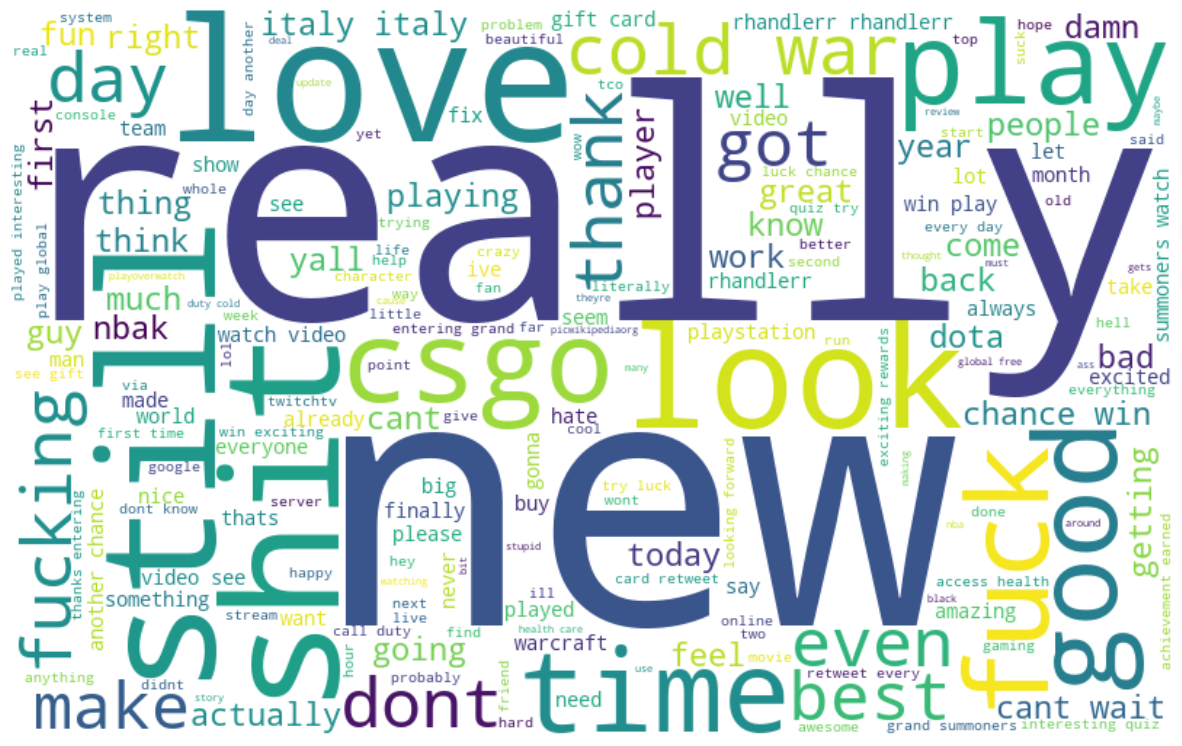

In [131]:
all_words_cleaned = ' '.join(training_data['cleaned_tweet_content'])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_words_cleaned)
wordcloud.to_file('../visualizations/wordcloud_cleaned.png')
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

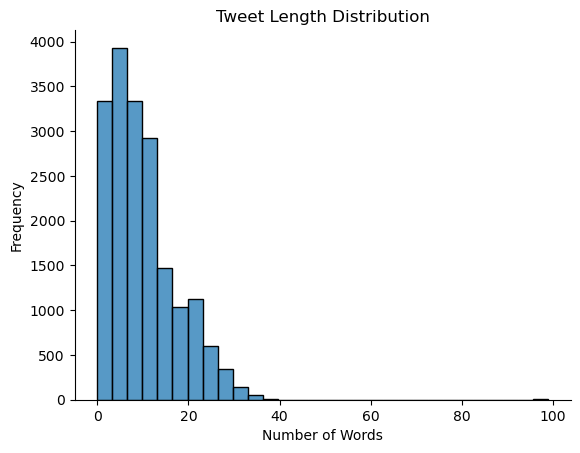

In [59]:
training_data['tweet_length'] = training_data['cleaned_tweet_content'].apply(lambda x: len(x.split()))
sns.histplot(training_data['tweet_length'], bins=30)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

sns.despine()

plt.savefig('../visualizations/tweet_length_distribution.png')
plt.show()

In [113]:
training_data.to_csv('../data/cleaned_twitter_training.csv')
validation_data.to_csv('../data/cleaned_twitter_validation.csv')